<a href="https://colab.research.google.com/github/aarti-singh22/global-terrorism-analysis/blob/main/Global_Terrorism_by_Aarti.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

# <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>

**IMPORT LIBRARIES**

To get started we need to import some libraries.

In [1]:
#Import the useful libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

**THE DATA**

Reading GLobal Terrorism Data.csv into Pandas dataframe.

In [2]:
# Mount your drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Specifying file path 
filepath = '/content/drive/MyDrive/Global Terrorism Analysis – Aarti Hada/Copy of Global Terrorism Data.csv'
# To detect the character encoding of file.
import chardet
with open(filepath, 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'confidence': 0.73, 'encoding': 'ISO-8859-1', 'language': ''}

In [4]:
# loading csv File
terrorism = pd.read_csv(filepath, encoding = 'ISO-8859-1')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
# To show all columns of Pandas dataframe.
pd.set_option('display.max_columns', None)
# Print head of dataframe.
terrorism.head()

eventid  iyear  imonth  iday approxdate  extended resolution  country  \
0  197000000001   1970       7     2        NaN         0        NaN       58   
1  197000000002   1970       0     0        NaN         0        NaN      130   
2  197001000001   1970       1     0        NaN         0        NaN      160   
3  197001000002   1970       1     0        NaN         0        NaN       78   
4  197001000003   1970       1     0        NaN         0        NaN      101   

          country_txt  region                   region_txt provstate  \
0  Dominican Republic       2  Central America & Caribbean       NaN   
1              Mexico       1                North America   Federal   
2         Philippines       5               Southeast Asia    Tarlac   
3              Greece       8               Western Europe    Attica   
4               Japan       4                    East Asia   Fukouka   

            city   latitude   longitude  specificity  vicinity location  \
0  Santo Domingo  18.456792  -69.951164          1.0         0      NaN   
1    Mexico city  19.371887  -99.086624          1.0         0      NaN   
2        Unknown  15.478598  120.599741          4.0         0      NaN   
3         Athens  37.997490   23.762728          1.0         0      NaN   
4        Fukouka  33.580412  130.396361          1.0         0      NaN   

  summary  crit1  crit2  crit3  doubtterr  alternative alternative_txt  \
0     NaN      1      1      1        0.0          NaN             NaN   
1     NaN      1      1      1        0.0          NaN             NaN   
2     NaN      1      1      1        0.0          NaN             NaN   
3     NaN      1      1      1        0.0          NaN             NaN   
4     NaN      1      1      1       -9.0          NaN             NaN   

   multiple  success  suicide  attacktype1                 attacktype1_txt  \
0       0.0        1        0            1                   Assassination   
1       0.0        1        0            6     Hostage Taking (Kidnapping)   
2       0.0        1        0            1                   Assassination   
3       0.0        1        0            3               Bombing/Explosion   
4       0.0        1        0            7  Facility/Infrastructure Attack   

   attacktype2 attacktype2_txt  attacktype3 attacktype3_txt  targtype1  \
0          NaN             NaN          NaN             NaN         14   
1          NaN             NaN          NaN             NaN          7   
2          NaN             NaN          NaN             NaN         10   
3          NaN             NaN          NaN             NaN          7   
4          NaN             NaN          NaN             NaN          7   

                 targtype1_txt  targsubtype1  \
0  Private Citizens & Property          68.0   
1      Government (Diplomatic)          45.0   
2          Journalists & Media          54.0   
3      Government (Diplomatic)          46.0   
4      Government (Diplomatic)          46.0   

                                    targsubtype1_txt  \
0                                     Named Civilian   
1  Diplomatic Personnel (outside of embassy, cons...   
2                    Radio Journalist/Staff/Facility   
3                                  Embassy/Consulate   
4                                  Embassy/Consulate   

                         corp1                  target1  natlty1  \
0                          NaN             Julio Guzman     58.0   
1  Belgian Ambassador Daughter  Nadine Chaval, daughter     21.0   
2             Voice of America                 Employee    217.0   
3                          NaN             U.S. Embassy    217.0   
4                          NaN           U.S. Consulate    217.0   

          natlty1_txt  targtype2 targtype2_txt  targsubtype2 targsubtype2_txt  \
0  Dominican Republic        NaN           NaN           NaN              NaN   
1             Belgium        NaN           NaN           NaN              NaN   


In [7]:
# Descriptive summary statistics for the dataset
terrorism.describe()

eventid          iyear         imonth           iday  \
count  1.816910e+05  181691.000000  181691.000000  181691.000000   
mean   2.002705e+11    2002.638997       6.467277      15.505644   
std    1.325957e+09      13.259430       3.388303       8.814045   
min    1.970000e+11    1970.000000       0.000000       0.000000   
25%    1.991021e+11    1991.000000       4.000000       8.000000   
50%    2.009022e+11    2009.000000       6.000000      15.000000   
75%    2.014081e+11    2014.000000       9.000000      23.000000   
max    2.017123e+11    2017.000000      12.000000      31.000000   

            extended        country         region       latitude  \
count  181691.000000  181691.000000  181691.000000  177135.000000   
mean        0.045346     131.968501       7.160938      23.498343   
std         0.208063     112.414535       2.933408      18.569242   
min         0.000000       4.000000       1.000000     -53.154613   
25%         0.000000      78.000000       5.000000      11.510046   
50%         0.000000      98.000000       6.000000      31.467463   
75%         0.000000     160.000000      10.000000      34.685087   
max         1.000000    1004.000000      12.000000      74.633553   

          longitude    specificity       vicinity          crit1  \
count  1.771340e+05  181685.000000  181691.000000  181691.000000   
mean  -4.586957e+02       1.451452       0.068297       0.988530   
std    2.047790e+05       0.995430       0.284553       0.106483   
min   -8.618590e+07       1.000000      -9.000000       0.000000   
25%    4.545640e+00       1.000000       0.000000       1.000000   
50%    4.324651e+01       1.000000       0.000000       1.000000   
75%    6.871033e+01       1.000000       0.000000       1.000000   
max    1.793667e+02       5.000000       1.000000       1.000000   

               crit2          crit3      doubtterr   alternative  \
count  181691.000000  181691.000000  181690.000000  29011.000000   
mean        0.993093       0.875668      -0.523171      1.292923   
std         0.082823       0.329961       2.455819      0.703729   
min         0.000000       0.000000      -9.000000      1.000000   
25%         1.000000       1.000000       0.000000      1.000000   
50%         1.000000       1.000000       0.000000      1.000000   
75%         1.000000       1.000000       0.000000      1.000000   
max         1.000000       1.000000       1.000000      5.000000   

            multiple        success        suicide    attacktype1  \
count  181690.000000  181691.000000  181691.000000  181691.000000   
mean        0.137773       0.889598       0.036507       3.247547   
std         0.344663       0.313391       0.187549       1.915772   
min         0.000000       0.000000       0.000000       1.000000   
25%         0.000000       1.000000       0.000000       2.000000   
50%         0.000000       1.000000       0.000000       3.000000   
75%         0.000000       1.000000       0.000000       3.000000   
max         1.000000       1.000000       1.000000       9.000000   

       attacktype2  attacktype3      targtype1   targsubtype1        natlty1  \
count  6314.000000   428.000000  181691.000000  171318.000000  180132.000000   
mean      3.719512     5.245327       8.439719      46.971474     127.686441   
std       2.272023     2.246642       6.653838      30.953357      89.299120   
min       1.000000     1.000000       1.000000       1.000000       4.000000   
25%       2.000000     2.000000       3.000000      22.000000      83.000000   
50%       2.000000     7.000000       4.000000      35.000000     101.000000   
75%       7.000000     7.000000      14.000000      74.000000     173.000000   
max       9.000000     8.000000      22.000000     113.000000    1004.000000   

          targtype2  targsubtype2       natlty2    targtype3  targsubtype3  \
count  11144.000000  10685.000000  10828.000000  1176.000000   1097.000000   
mean      10.247218     55.311652    131.179442    1

In [8]:
# Estimating the size of data
terrorism.shape

(181691, 135)

The dataset has 181691 rows and 135 columns.

# **EXPLORATORY DATA ANALYSIS**

We start with checking out the missing data.

**MISSING DATA**

Firstly, we will find out the null values and percentage of null values in each column.

In [9]:
# To show all the rows of Pandas dataframe.
pd.set_option('display.max_rows', None)
# Checking missing values
total = terrorism.isnull().sum().sort_values(ascending = False)
# Percentage of Null values
percentage = ((terrorism.isnull().sum()/terrorism.isnull().count()) * 100 ).sort_values(ascending = False)
missing_values = pd.concat([total,percentage], axis = 1, keys = ['Total', 'Percentage'])
missing_values

Total  Percentage
gsubname3           181671   99.988992
weapsubtype4_txt    181621   99.961473
weapsubtype4        181621   99.961473
weaptype4           181618   99.959822
weaptype4_txt       181618   99.959822
claimmode3          181558   99.926799
claimmode3_txt      181558   99.926799
gsubname2           181531   99.911938
claim3              181373   99.824978
guncertain3         181371   99.823877
gname3              181367   99.821675
divert              181367   99.821675
attacktype3         181263   99.764435
attacktype3_txt     181263   99.764435
ransomnote          181177   99.717102
ransompaidus        181139   99.696187
ransomamtus         181128   99.690133
claimmode2          181075   99.660963
claimmode2_txt      181075   99.660963
ransompaid          180917   99.574002
corp3               180665   99.435305
targsubtype3        180594   99.396228
targsubtype3_txt    180594   99.396228
natlty3_txt         180544   99.368708
natlty3             180544   99.368708
target3             180516   99.353298
targtype3           180515   99.352747
targtype3_txt       180515   99.352747
ransomamt           180341   99.256980
weapsubtype3_txt    179998   99.068198
weapsubtype3        179998   99.068198
weaptype3_txt       179828   98.974633
weaptype3           179828   98.974633
claim2              179801   98.959772
guncertain2         179736   98.923997
gname2              179678   98.892075
resolution          179471   98.778145
kidhijcountry       178386   98.180978
nhours              177628   97.763786
compclaim           176852   97.336687
gsubname            175801   96.758232
attacktype2         175377   96.524869
attacktype2_txt     175377   96.524869
ndays               173567   95.528672
approxdate          172452   94.914993
corp2               171574   94.431755
nreleased           171291   94.275996
targsubtype2        171006   94.119136
targsubtype2_txt    171006   94.119136
natlty2             170863   94.040431
natlty2_txt         170863   94.040431
hostkidoutcome_txt  170700   93.950719
hostkidoutcome      170700   93.950719
target2             170671   93.934757
targtype2_txt       170547   93.866510
targtype2           170547   93.866510
weapsubtype2        170149   93.647456
weapsubtype2_txt    170149   93.647456
weaptype2           168564   92.775096
weaptype2_txt       168564   92.775096
nhostkidus          168174   92.560446
nhostkid            168119   92.530175
claimmode_txt       162608   89.497003
claimmode           162608   89.497003
related             156653   86.219461
addnotes            153402   84.430159
alternative         152680   84.032781
alternative_txt     152680   84.032781
propvalue           142702   78.541039
scite3              138175   76.049447
motive              131130   72.171984
location            126196   69.456385
propcomment         123732   68.100236
propextent          117626   64.739585
propextent_txt      117626   64.739585
scite2              104758   57.657231
ransom              104310   57.410659
nperps               71115   39.140629
nperpcap             69489   38.245703
nwoundte             69143   38.055270
weapdetail           67670   37.244553
nkillter             66958   36.852678
scite1               66191   36.430533
summary              66129   36.396409
claimed              66120   36.391456
nwoundus             64702   35.611010
nkillus              64446   35.470111
corp1                42550   23.418882
weapsubtype1         20768   11.430396
weapsubtype1_txt     20768   11.430396
nwound               16311    8.977330
targsubtype1         10373    5.709144
targsubtype1_txt     10373    5.709144
nkill                10313    5.676120
longitude             4557    2.508104
latitude              4556    2.507554
natlty1               1559    0.858050
natlty1_txt           1559    0.858050
target1                636    0.350045
city                   434    0.238867
provstate              421    0.231712
guncertain1            380    0.209146
isho

**Next, we will remove the columns with null values greater then 75% or the columns which does not contribute much to the analysis and keep only the columns which proffer to analysis.**

In [10]:
# Keeping only necessary columns in the dataset
new_columns = ['success','attacktype1_txt', 'weaptype1_txt', 'region_txt', 'country_txt', 'gname', 'targtype1_txt', 'imonth', 'iday','iyear','provstate','target1','nkill','nwound','summary','motive' ]
terrorism = terrorism[new_columns]

In [11]:
# Printing last five records of the modified dataset
terrorism.tail()

success                 attacktype1_txt weaptype1_txt  \
181686        1                   Armed Assault      Firearms   
181687        1               Bombing/Explosion    Explosives   
181688        1  Facility/Infrastructure Attack    Incendiary   
181689        0               Bombing/Explosion    Explosives   
181690        0               Bombing/Explosion    Explosives   

                        region_txt  country_txt  \
181686          Sub-Saharan Africa      Somalia   
181687  Middle East & North Africa        Syria   
181688              Southeast Asia  Philippines   
181689                  South Asia        India   
181690              Southeast Asia  Philippines   

                                             gname  \
181686                                  Al-Shabaab   
181687                           Muslim extremists   
181688  Bangsamoro Islamic Freedom Movement (BIFM)   
181689                                     Unknown   
181690                                     Unknown   

                      targtype1_txt  imonth  iday  iyear        provstate  \
181686                     Military      12    31   2017  Middle Shebelle   
181687                     Military      12    31   2017         Lattakia   
181688  Private Citizens & Property      12    31   2017      Maguindanao   
181689         Government (General)      12    31   2017          Manipur   
181690                      Unknown      12    31   2017      Maguindanao   

                 target1  nkill  nwound  \
181686        Checkpoint    1.0     2.0   
181687  Hmeymim Air Base    2.0     7.0   
181688            Houses    0.0     0.0   
181689            Office    0.0     0.0   
181690           Unknown    0.0     0.0   

                                                  summary motive  
181686  12/31/2017: Assailants opened fire on a Somali...    NaN  
181687  12/31/2017: Assailants launched mortars at the...    NaN  
181688  12/31/2017: Assailants set fire to houses in K...    NaN  
181689  12/31/2017: Assailants threw a grenade at a Fo...    NaN  
181690  12/31/2017: An explosive device was discovered...    NaN

In [12]:
# Checking the shape to verify number of columns
terrorism.shape

(181691, 16)

The number of columns is reduced to 16.

**DATA DESCRIPTION**

To understand the data in the column and the meaning of the column name we will see the unique values of each column.


In [13]:
# Returns all unique elements of the column success.
terrorism['success'].unique()

array([1, 0])

In [14]:
# Returns all unique elements of the column attacktype1_txt.
terrorism['attacktype1_txt'].unique()

array(['Assassination', 'Hostage Taking (Kidnapping)',
       'Bombing/Explosion', 'Facility/Infrastructure Attack',
       'Armed Assault', 'Hijacking', 'Unknown', 'Unarmed Assault',
       'Hostage Taking (Barricade Incident)'], dtype=object)

In [15]:
# Returns all unique elements of the column weaptype1_txt.
terrorism['weaptype1_txt'].unique()

array(['Unknown', 'Explosives', 'Incendiary', 'Firearms', 'Chemical',
       'Melee', 'Sabotage Equipment',
       'Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)',
       'Fake Weapons', 'Radiological', 'Other', 'Biological'],
      dtype=object)

In [16]:
# Returns all unique elements of the column region_txt.
terrorism['region_txt'].unique()

array(['Central America & Caribbean', 'North America', 'Southeast Asia',
       'Western Europe', 'East Asia', 'South America', 'Eastern Europe',
       'Sub-Saharan Africa', 'Middle East & North Africa',
       'Australasia & Oceania', 'South Asia', 'Central Asia'],
      dtype=object)

In [17]:
# Returns all unique elements of the column country_txt.
terrorism['country_txt'].unique()

array(['Dominican Republic', 'Mexico', 'Philippines', 'Greece', 'Japan',
       'United States', 'Uruguay', 'Italy', 'East Germany (GDR)',
       'Ethiopia', 'Guatemala', 'Venezuela', 'West Germany (FRG)',
       'Switzerland', 'Jordan', 'Spain', 'Brazil', 'Egypt', 'Argentina',
       'Lebanon', 'Ireland', 'Turkey', 'Paraguay', 'Iran',
       'United Kingdom', 'Colombia', 'Bolivia', 'Nicaragua',
       'Netherlands', 'Belgium', 'Canada', 'Australia', 'Pakistan',
       'Zambia', 'Sweden', 'Costa Rica', 'South Yemen', 'Cambodia',
       'Israel', 'Poland', 'Taiwan', 'Panama', 'Kuwait',
       'West Bank and Gaza Strip', 'Austria', 'Czechoslovakia', 'India',
       'France', 'South Vietnam', 'Brunei', 'Zaire',
       "People's Republic of the Congo", 'Portugal', 'Algeria',
       'El Salvador', 'Thailand', 'Haiti', 'Sudan', 'Morocco', 'Cyprus',
       'Myanmar', 'Afghanistan', 'Peru', 'Chile', 'Honduras',
       'Yugoslavia', 'Ecuador', 'New Zealand', 'Malaysia', 'Singapore',
       'Bot

In [18]:
# Returns all unique elements of the column gname.
terrorism['gname'].unique()

array(['MANO-D', '23rd of September Communist League', 'Unknown', ...,
       'Fatoni Warriors', 'Minorities of Metropolitan Attacks',
       'Baloch Republican Party'], dtype=object)

In [19]:
# Returns all unique elements of the column targtype1_txt.
terrorism['targtype1_txt'].unique()

array(['Private Citizens & Property', 'Government (Diplomatic)',
       'Journalists & Media', 'Police', 'Utilities', 'Military',
       'Government (General)', 'Airports & Aircraft', 'Business',
       'Educational Institution', 'Violent Political Party',
       'Religious Figures/Institutions', 'Unknown', 'Transportation',
       'Tourists', 'NGO', 'Telecommunication', 'Food or Water Supply',
       'Terrorists/Non-State Militia', 'Other', 'Maritime',
       'Abortion Related'], dtype=object)

In [20]:
# Returns all unique elements of the column imonth.
terrorism['imonth'].unique()

array([ 7,  0,  1,  2,  3,  4,  5,  6,  8,  9, 10, 11, 12])

In [21]:
# Returns all unique elements of the column iday.
terrorism['iday'].unique()

array([ 2,  0,  1,  3,  6,  8,  9, 10, 11, 12, 13, 14, 15, 19, 20, 21, 22,
       25, 26, 27, 28, 30, 31,  4,  7, 16, 17, 18, 23, 24,  5, 29])

In [22]:
# Returns all unique elements of the column iyear.
terrorism['iyear'].unique()

array([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
       1981, 1986, 1982, 1983, 1984, 1985, 1987, 1988, 1989, 1990, 1991,
       1992, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017])

In [23]:
# Returns all unique elements of the column provstate.
terrorism['provstate'].unique()

array([nan, 'Federal', 'Tarlac', ..., 'Carlow', 'Western Lakes',
       'Vidzeme'], dtype=object)

In [24]:
# Returns all unique elements of the column target1.
terrorism['target1'].unique()

array(['Julio Guzman', 'Nadine Chaval, daughter', 'Employee', ...,
       'Personal Security Officer of Council Member Ihuing Pame: Prafulla Phukan',
       'Jewelry Shop', 'Hmeymim Air Base'], dtype=object)

In [25]:
# Returns all unique elements of the column nkill.
terrorism['nkill'].unique()

array([1.000e+00, 0.000e+00,       nan, 7.000e+00, 4.700e+01, 2.000e+00,
       3.600e+01, 5.000e+00, 3.000e+00, 4.000e+00, 2.500e+01, 1.500e+01,
       2.600e+01, 8.000e+00, 8.100e+01, 6.000e+00, 9.000e+00, 1.600e+01,
       3.000e+01, 3.100e+01, 1.200e+01, 2.100e+01, 1.400e+01, 8.800e+01,
       1.100e+01, 1.000e+01, 2.700e+01, 1.800e+01, 2.200e+01, 1.900e+01,
       9.200e+01, 1.300e+01, 7.300e+01, 1.000e+02, 4.200e+01, 4.300e+01,
       1.700e+01, 9.800e+01, 4.220e+02, 4.800e+01, 3.400e+01, 5.400e+01,
       5.000e+01, 3.500e+01, 2.000e+01, 4.100e+01, 3.700e+01, 2.800e+01,
       4.000e+01, 3.200e+01, 8.500e+01, 2.300e+01, 3.000e+02, 6.000e+01,
       2.400e+01, 5.800e+01, 7.000e+01, 8.700e+01, 4.500e+01, 3.800e+01,
       2.900e+01, 7.400e+01, 8.300e+01, 9.000e+01, 6.600e+01, 8.000e+01,
       6.700e+01, 5.100e+01, 3.900e+01, 1.140e+02, 1.240e+02, 7.600e+01,
       3.300e+01, 7.500e+01, 5.700e+01, 6.200e+01, 4.600e+01, 5.600e+01,
       6.300e+01, 1.200e+02, 1.020e+02, 7.800e+01, 

In [26]:
# Returns all unique elements of the column nwound.
terrorism['nwound'].unique()

array([0.000e+00,       nan, 1.000e+00, 2.000e+00, 7.000e+00, 9.000e+00,
       1.700e+01, 5.000e+00, 3.000e+00, 1.000e+01, 1.200e+01, 2.000e+01,
       4.000e+00, 1.100e+01, 2.700e+01, 1.300e+01, 1.900e+01, 1.300e+02,
       5.600e+01, 2.400e+01, 6.000e+00, 7.200e+01, 2.380e+02, 5.500e+01,
       1.500e+01, 8.000e+00, 1.800e+01, 5.000e+01, 3.400e+01, 1.400e+01,
       7.000e+01, 1.020e+02, 4.100e+01, 4.800e+01, 3.600e+01, 2.500e+01,
       8.100e+01, 5.400e+01, 5.300e+01, 1.000e+02, 4.500e+01, 3.300e+01,
       4.000e+01, 6.200e+01, 7.400e+01, 2.200e+01, 3.100e+01, 1.600e+01,
       3.000e+01, 2.850e+02, 2.300e+01, 4.200e+01, 4.300e+01, 7.600e+01,
       4.400e+01, 5.200e+01, 4.600e+01, 4.900e+01, 1.600e+02, 3.700e+01,
       2.100e+01, 6.000e+01, 7.800e+01, 2.600e+01, 2.800e+01, 3.900e+01,
       3.800e+01, 3.500e+01, 3.200e+01, 8.000e+01, 4.700e+01, 1.880e+02,
       2.150e+02, 8.500e+01, 7.500e+01, 1.610e+02, 9.000e+01, 3.000e+02,
       9.500e+01, 1.350e+02, 6.100e+01, 1.380e+02, 

In [27]:
# Returns all unique elements of the column summary.
terrorism['summary'].unique()

array([nan,
       '1/1/1970: Unknown African American assailants fired several bullets at police headquarters in Cairo, Illinois, United States.  There were no casualties, however, one bullet narrowly missed several police officers.  This attack took place during heightened racial tensions, including a Black boycott of White-owned businesses, in Cairo Illinois.',
       '1/2/1970: Unknown perpetrators detonated explosives at the Pacific Gas & Electric Company Edes substation in Oakland, California, United States.  Three transformers were damaged costing an estimated $20,000 to $25,000.  There were no casualties.',
       ...,
       '12/31/2017: Assailants set fire to houses in Kubentog, Datu Hoffer, Maguindanao, Philippines. There were no reported casualties in the attack. No group claimed responsibility for the incident; however, sources attributed the attack to the Bangsamoro Islamic Freedom Movement (BIFM).',
       '12/31/2017: Assailants threw a grenade at a Forest Department of

In [28]:
# Returns all unique elements of the column motive.
terrorism['motive'].unique()

array([nan, 'To protest the Cairo Illinois Police Deparment',
       'To protest the War in Vietnam and the draft', ...,
       'The specific motive is unknown; however, sources stated that the attack was carried out in retaliation for the death of Noor Mohammad Tantray (Noor Trali), a Jaish-e-Mohammad (JeM) leader, by security personnel on December 26, 2017 in Pulwama.',
       'The specific motive is unknown; however, sources noted that the targeted building housed migrants.',
       'The specific motive is unknown; however, sources stated that the Taliban had warned one of the victims against collaborating with the government.'],
      dtype=object)

**DATA DICTIONARY**

1. success : The record of attack's success or failure..
2. attacktype1_txt :  The type of terrorist attack, whether it was Bombing, Explosion, Assassination etc.
3. weaptype1_txt : The type of weapons used by terrorist to attack.
4. region_txt : The region where attack happened.
5. country_txt : The country in that particular region where the attack took place.
6. gname : This refers to the terrorist group.
7. targtype1_txt : This refers to the group or media on which the attack was targeted.
8. imonth : month of attack.
9. iday : Date of attack.
10. iyear : year of attack.
11. provstate : Refers to the state.
12. target1 : Main target of attack.
13. nkill : Number of people killed.
14. nwound : Number of people wounded.
15. summary : Summary of the attack.
16. motive : Motive of the attack

In [29]:
#Changing column names to make more sense.
terrorism.rename(columns = {'success':'Attack_Success','attacktype1_txt':'Attack_Type','weaptype1_txt':'Weapon_Used','region_txt':'Region','country_txt':'Country','gname':'Terrorist_group','targtype1_txt':'Targeted_group','imonth':'Month','iday':'Day','iyear':'Year','provstate':'State','target1':'Main_Target','nkill':'Killed','nwound':'Wounded','summary':'Attack_Summary','motive':'Attack_Motive'}, inplace = True)

In [30]:
# Returns the column labels of the DataFrame
terrorism.columns

Index(['Attack_Success', 'Attack_Type', 'Weapon_Used', 'Region', 'Country',
       'Terrorist_group', 'Targeted_group', 'Month', 'Day', 'Year', 'State',
       'Main_Target', 'Killed', 'Wounded', 'Attack_Summary', 'Attack_Motive'],
      dtype='object')

**REMOVING DUPLICATE ROWS**

In [31]:
#Shows number of duplicate rows
terrorism[terrorism.duplicated()].shape

(10039, 16)

In [32]:
# Size of dataset
terrorism.shape

(181691, 16)

In [33]:
#Remove Duplicates
terrorism.drop_duplicates(inplace= True)

In [34]:
# Size of new dataset
terrorism.shape

(171652, 16)

**REMAINING MISSING DATAS**


In [35]:
# Null values and its counts
terrorism.isnull().sum()

Attack_Success          0
Attack_Type             0
Weapon_Used             0
Region                  0
Country                 0
Terrorist_group         0
Targeted_group          0
Month                   0
Day                     0
Year                    0
State                 421
Main_Target           540
Killed               9263
Wounded             15091
Attack_Summary      58671
Attack_Motive      121790
dtype: int64

In [36]:
# Concise summary of dataset
terrorism.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171652 entries, 0 to 181690
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Attack_Success   171652 non-null  int64  
 1   Attack_Type      171652 non-null  object 
 2   Weapon_Used      171652 non-null  object 
 3   Region           171652 non-null  object 
 4   Country          171652 non-null  object 
 5   Terrorist_group  171652 non-null  object 
 6   Targeted_group   171652 non-null  object 
 7   Month            171652 non-null  int64  
 8   Day              171652 non-null  int64  
 9   Year             171652 non-null  int64  
 10  State            171231 non-null  object 
 11  Main_Target      171112 non-null  object 
 12  Killed           162389 non-null  float64
 13  Wounded          156561 non-null  float64
 14  Attack_Summary   112981 non-null  object 
 15  Attack_Motive    49862 non-null   object 
dtypes: float64(2), int64(4), object(10)
me

Fill the Null values.

In [37]:
# Fill the missing values for Killed and Wounded with 0 and converting their datatypes from float to int.
terrorism['Killed'] = terrorism['Killed'].fillna(0).astype(int)
terrorism['Wounded'] = terrorism['Wounded'].fillna(0).astype(int)
# Fill the missing values for Attack Summary, Attack Motive and Main Target with Not Known
terrorism['Attack_Summary'].fillna('Not Known', inplace = True)
terrorism['Attack_Motive'].fillna('Not Known', inplace = True)
terrorism['Main_Target'].fillna('Not Known', inplace = True)

In [38]:
# Checking Null values again
terrorism.isnull().sum()

Attack_Success       0
Attack_Type          0
Weapon_Used          0
Region               0
Country              0
Terrorist_group      0
Targeted_group       0
Month                0
Day                  0
Year                 0
State              421
Main_Target          0
Killed               0
Wounded              0
Attack_Summary       0
Attack_Motive        0
dtype: int64

# **UNIVARIATE ANALYSIS**

**1. Explore the types of attack.**

In [39]:
# Returns counts of unique values in the column Attack_Type. The result is in Descending order.
terrorism['Attack_Type'].value_counts()

Bombing/Explosion                      81935
Armed Assault                          41144
Assassination                          18874
Hostage Taking (Kidnapping)            10969
Facility/Infrastructure Attack          9292
Unknown                                 6914
Hostage Taking (Barricade Incident)      939
Unarmed Assault                          932
Hijacking                                653
Name: Attack_Type, dtype: int64

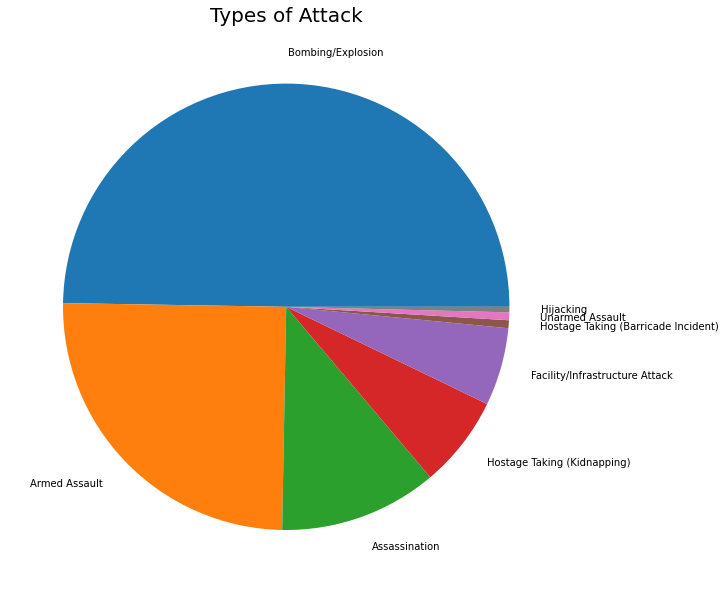

In [45]:
# Plot pie chart
plt.figure(figsize = (10,15))
labels = terrorism['Attack_Type'].value_counts().index.drop('Unknown')
plt.pie(terrorism['Attack_Type'].value_counts().drop('Unknown'), labels = labels, labeldistance=1.14)
plt.title('Types of Attack', fontsize = 20)
plt.show()

**Conclusion** - The maximum number of Terrorist attacks are from Bombing Explosion followed by Armed Assault then Assassination and so on.


**2. Explore Countries which suffer most from Terrorism.**

In [46]:
# Returns first ten counts of unique values in the column Country.
terrorism['Country'].value_counts()[:10]

Iraq              23441
Pakistan          13789
Afghanistan       12491
India             11558
Colombia           7490
Philippines        6762
Peru               5037
United Kingdom     4968
El Salvador        4190
Somalia            4121
Name: Country, dtype: int64

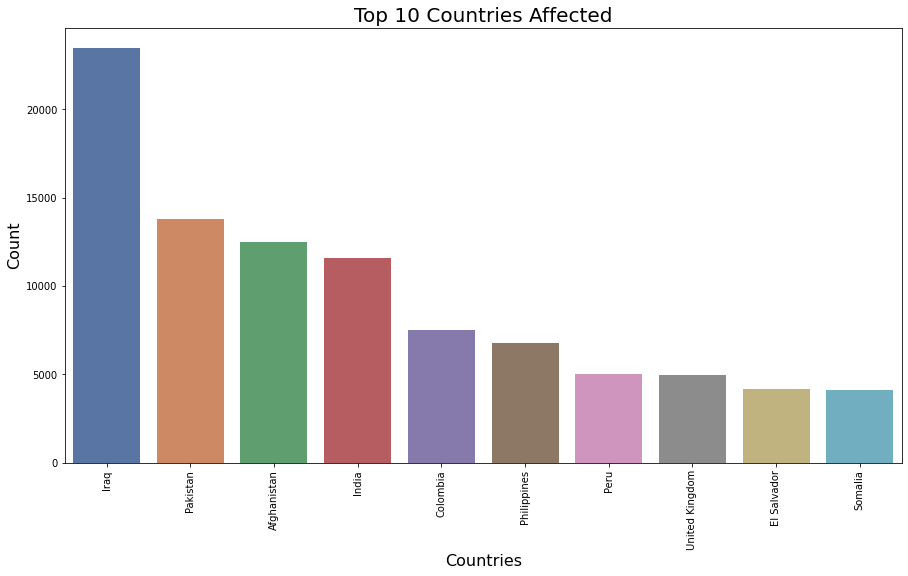

In [47]:
# Plot barchart
plt.figure(figsize = (15,8))
sns.barplot(x = terrorism['Country'].value_counts()[:10].index, y = terrorism['Country'].value_counts()[:10].values, palette = 'deep')
plt.title('Top 10 Countries Affected', fontsize = 20)
plt.xlabel('Countries', fontsize = 16)
plt.ylabel('Count', fontsize = 16)
plt.xticks(rotation = 90)
plt.show()

**Conclusion** - The most affected country by terrorism is Iraq followed by Pakistan, then Afghanistan and then India.


**3. The group which is Targeted the most by Terrorism.**

In [48]:
# Returns first ten counts of unique values in the column Targeted_group.
terrorism['Targeted_group'].value_counts()[:10]

Private Citizens & Property       41410
Military                          27396
Police                            23770
Government (General)              20465
Business                          18861
Transportation                     6097
Unknown                            5206
Religious Figures/Institutions     4284
Educational Institution            4174
Utilities                          4118
Name: Targeted_group, dtype: int64

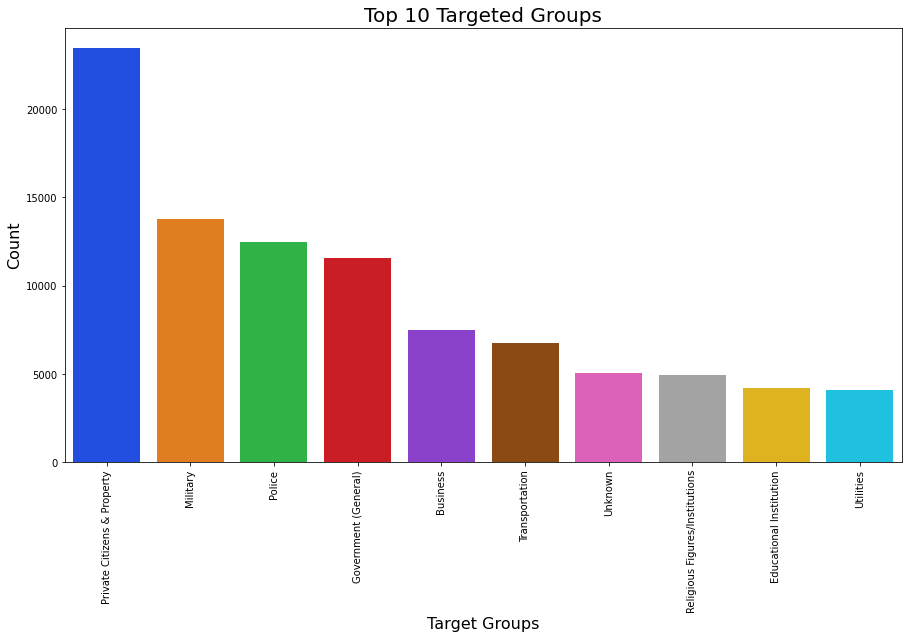

In [49]:
# Plot bar chart
plt.figure(figsize = (15,8))
sns.barplot(x = terrorism['Targeted_group'].value_counts()[:10].index, y = terrorism['Country'].value_counts()[:10].values, palette = 'bright')
plt.title('Top 10 Targeted Groups', fontsize = 20)
plt.xlabel('Target Groups', fontsize = 16)
plt.ylabel('Count', fontsize = 16)
plt.xticks(rotation = 90)
plt.show()

**Conclusion** - The most Targeted group is Private Citizens and Property.
Then the Military, Police and Government are targeted.


**4. States affected most by Terrorism**

In [50]:
# Returns first ten counts of unique values in the column State.
terrorism['State'].value_counts()[:10]

Baghdad               7625
Northern Ireland      4276
Unknown               3733
Balochistan           3670
Saladin               3145
Khyber Pakhtunkhwa    3060
Nineveh               3048
Diyala                2874
Al Anbar              2874
Sindh                 2719
Name: State, dtype: int64

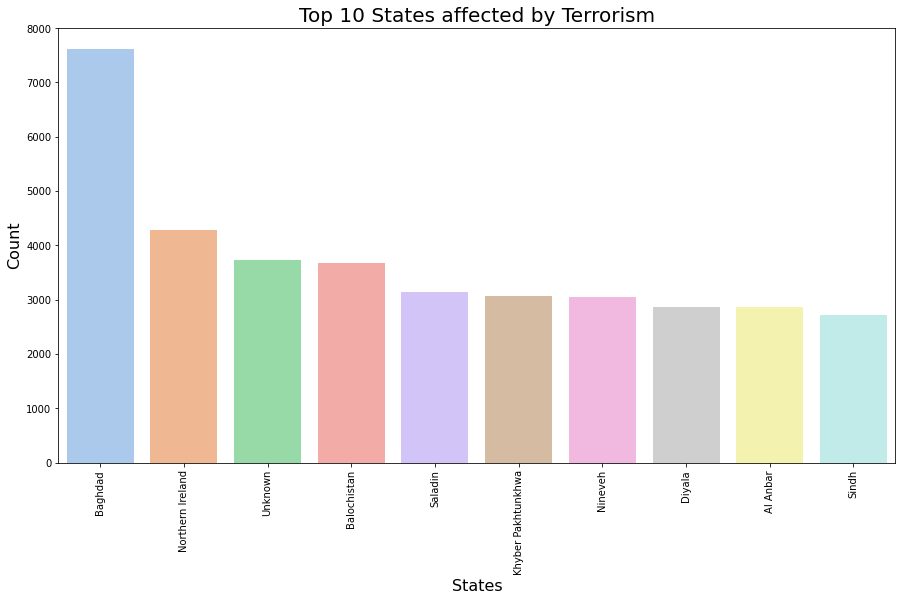

In [51]:
# Plot bar chart
plt.figure(figsize = (15,8))
sns.barplot(x = terrorism['State'].value_counts()[:10].index, y = terrorism['State'].value_counts()[:10].values, palette = 'pastel')
plt.title('Top 10 States affected by Terrorism', fontsize = 20)
plt.xlabel('States', fontsize = 16)
plt.ylabel('Count', fontsize = 16)
plt.xticks(rotation = 90)
plt.show()

**Conclusion** - Baghdad is the most affected state by Terrorism.


**5. Weapon Type used most in Terrorist Activity.**

In [52]:
# Returns first ten percentage values of the Weapon Used.
(terrorism['Weapon_Used'].value_counts().head(10)/terrorism['Weapon_Used'].shape)*100

Explosives                                                                     50.190502
Firearms                                                                       33.312749
Unknown                                                                         8.434507
Incendiary                                                                      5.546687
Melee                                                                           2.057069
Chemical                                                                        0.187006
Sabotage Equipment                                                              0.079230
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)     0.079230
Other                                                                           0.065248
Biological                                                                      0.020390
Name: Weapon_Used, dtype: float64

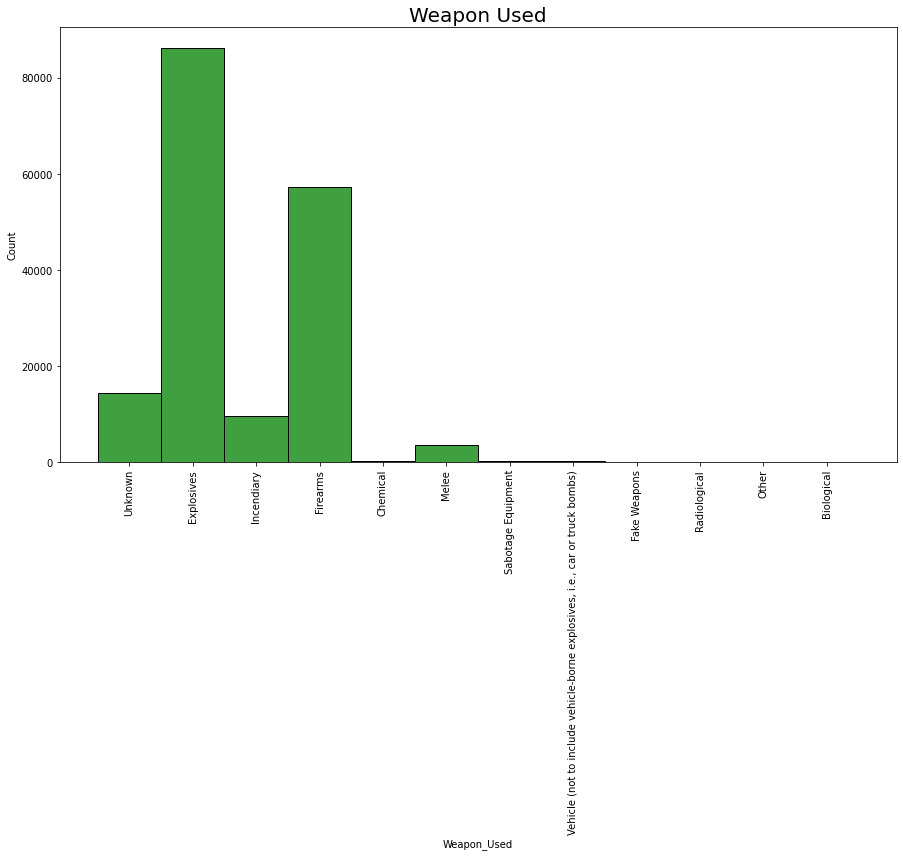

In [53]:
# Plot histogram
plt.figure(figsize = (15,8))
sns.histplot(terrorism['Weapon_Used'], color = 'green')
plt.title('Weapon Used', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

**Conclusion** - 50% of the Weapons used are Explosives and 33% of the Weapons used are Firearms by Terrorists.


**6. Terrorist Attack Year wise.**

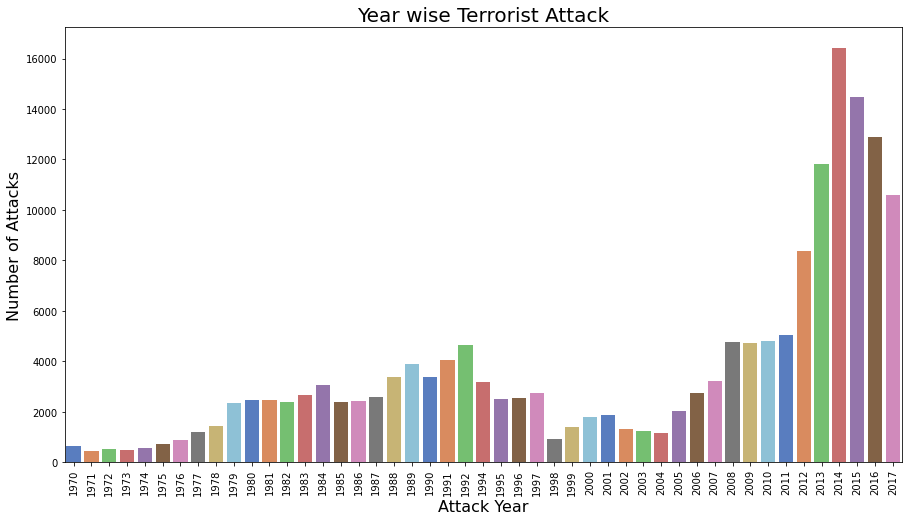

In [54]:
# Plot bar chart
plt.figure(figsize = (15,8))
sns.barplot(x = terrorism['Year'].value_counts().index, y = terrorism['Year'].value_counts().values, palette = 'muted')
plt.xlabel('Attack Year', fontsize = 16)
plt.ylabel('Number of Attacks', fontsize = 16)
plt.title('Year wise Terrorist Attack', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

**Conclusion** - There is a gradual increase in terrorist activities from 2012 onwards and 2014 has the highest number of terrorist attacks.


**7. Successful Terrorist Attack each year.**

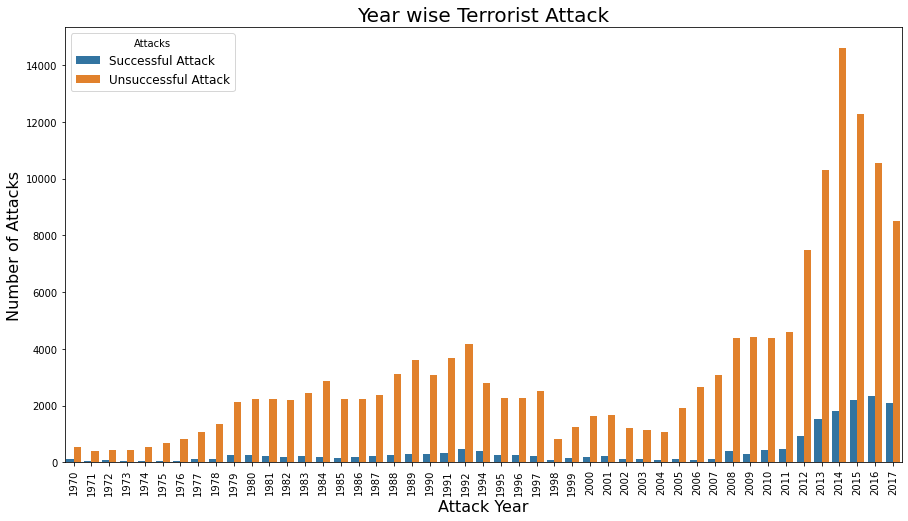

In [55]:
# Plots the count of Number of Attacks by Successful Attack and Unsuccessful Attack.
plt.figure(figsize = (15,8))
sns.countplot(x=terrorism['Year'], hue='Attack_Success', data=terrorism)
plt.xlabel('Attack Year', fontsize = 16)
plt.ylabel('Number of Attacks', fontsize = 16)
plt.title('Year wise Terrorist Attack', fontsize = 20)
plt.xticks(rotation = 90)
plt.legend(title='Attacks', loc='upper left', labels=['Successful Attack', 'Unsuccessful Attack'], fontsize=12)
plt.show()

**Conclusion** - In the year 2016, their were most number of successful attacks.


**8. Most active Terrorist Groups.**

In [56]:
# Returns first ten counts of unique values in the column Terrorist_group dropping the value 'Unknown'.
terrorism['Terrorist_group'].value_counts().drop('Unknown').head(10)

Taliban                                             7283
Islamic State of Iraq and the Levant (ISIL)         5180
Shining Path (SL)                                   3748
Al-Shabaab                                          3267
New People's Army (NPA)                             2691
Irish Republican Army (IRA)                         2438
Farabundo Marti National Liberation Front (FMLN)    2418
Boko Haram                                          2382
Revolutionary Armed Forces of Colombia (FARC)       2374
Kurdistan Workers' Party (PKK)                      2219
Name: Terrorist_group, dtype: int64

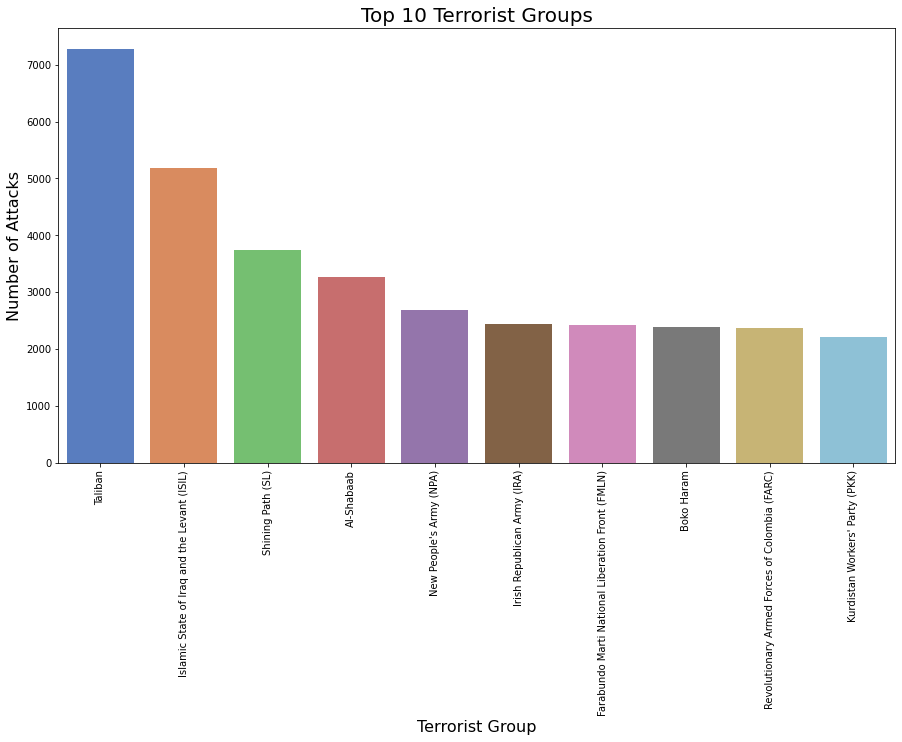

In [57]:
# Plot bar chart
plt.figure(figsize = (15,8))
sns.barplot(x = terrorism['Terrorist_group'].value_counts().drop('Unknown')[:10].index, y = terrorism['Terrorist_group'].value_counts().drop('Unknown')[:10].values, palette = 'muted')
plt.xlabel('Terrorist Group', fontsize = 16)
plt.ylabel('Number of Attacks', fontsize = 16)
plt.title('Top 10 Terrorist Groups', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

**Conclusion** - Here we clearly see, the most active group is Taliban followed by ISIL.


**9. Terrorist Activities by Region in each year.**

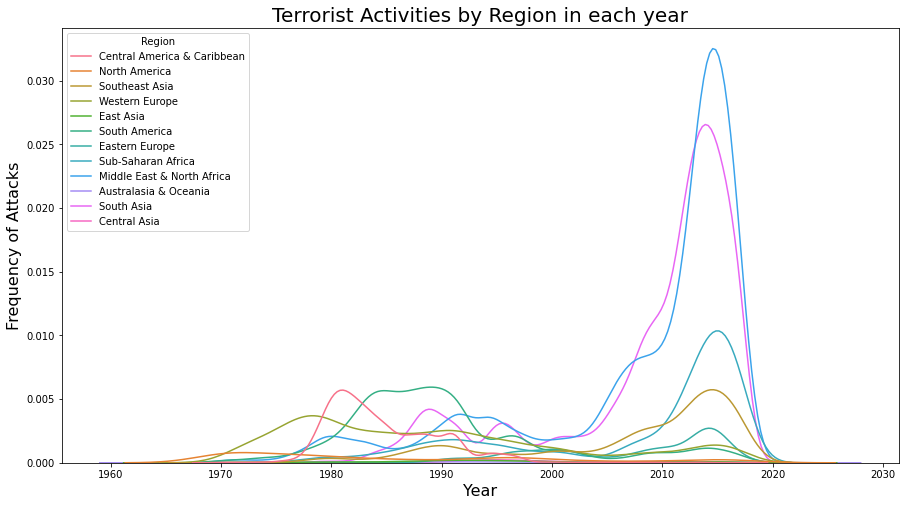

In [58]:
plt.figure(figsize=(15,8))
sns.kdeplot(terrorism['Year'], hue = terrorism['Region'])
plt.title('Terrorist Activities by Region in each year', fontsize = 20)
plt.xlabel('Year', fontsize = 16)
plt.ylabel('Frequency of Attacks', fontsize = 16)
plt.show()

**Conclusion** - Middle East & North Africa has the highest peak followed by South Asia. Hence, the maximum frequency of Terrorist Attacks are in Middle East and North Africa.

# **CORRELATION ANALYSIS**

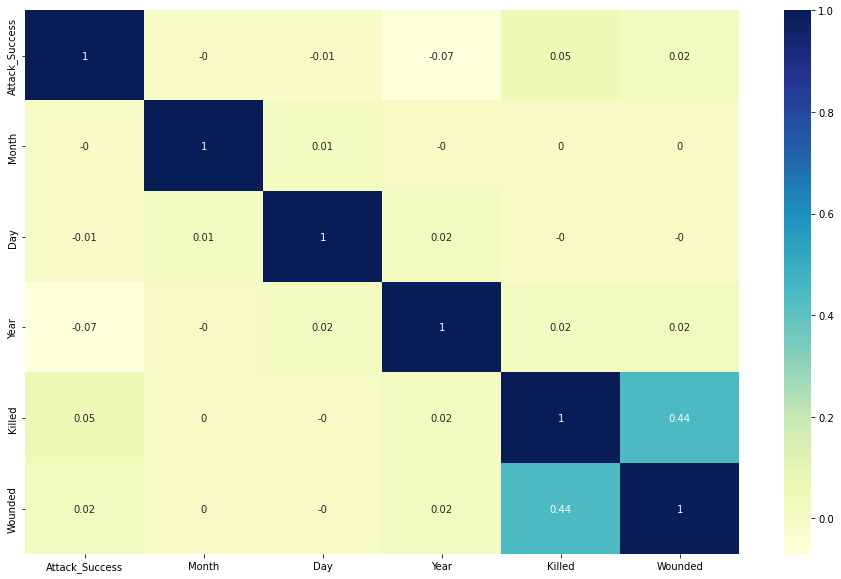

In [59]:
# Correlation plot
plt.figure(figsize = (16,10))
# Shows correlation of the parameters in dataset.
sns.heatmap(np.round(terrorism.corr(),2), annot = True, cmap = 'YlGnBu')

**Conclusion** - Their is as such no strong correlation between any attributes. Killed and Wounded are a bit correlated with correlation coefficient of 0.44.

# **BIVARIATE ANALYSIS**
If we analyze data by taking two variables/columns into consideration from a dataset, it is known as Bivariate Analysis.

**1. SCATTER PLOT DEPICTING NUMBER OF PEOPLE KILLED VS WOUNDED COUNTRY WISE AND THE CATEGORY THEY BELONGED TO FOR EACH YEAR.**

In [60]:
px.scatter(terrorism,terrorism.Wounded,terrorism.Killed,hover_name='Country',animation_frame='Year',animation_group='Country',color='Targeted_group',labels={'Wounded','Killed'}, title = 'Heaviest Hit Targeted Group Country wise for each year')

**Conclusion** - Here we can clearly see the number of people killed and wounded year wise in different countries and the group to which these people belonged. 
For instance in the year 1970, there were 4 people killed and 20 Wounded in Pakistan, and these people belonged to Government(Diplomatic).

**2. Since Taliban is the most active terrorist group. Let us now see the Taliban's terrorist attacks over the years.**

In [61]:
# Filter data
df = terrorism[terrorism.Terrorist_group == 'Taliban']
df.head()

Attack_Success                  Attack_Type Weapon_Used      Region  \
59040               1  Hostage Taking (Kidnapping)     Unknown  South Asia   
60014               1                    Hijacking  Explosives  South Asia   
60462               1                    Hijacking  Explosives  South Asia   
60786               0            Bombing/Explosion  Explosives  South Asia   
71682               1                Armed Assault    Firearms  South Asia   

           Country Terrorist_group               Targeted_group  Month  Day  \
59040  Afghanistan         Taliban                       Police      4   20   
60014  Afghanistan         Taliban          Airports & Aircraft      8    3   
60462  Afghanistan         Taliban          Airports & Aircraft      9   21   
60786  Afghanistan         Taliban          Airports & Aircraft     10   25   
71682  Afghanistan         Taliban  Private Citizens & Property      1    7   

       Year     State                                    Main_Target  Killed  \
59040  1995   Unknown                   Federal Investigation Agency       0   
60014  1995  Kandahar                   Russian Il-76 Cargo Aircraft       0   
60462  1995  Kandahar                                     Boeing 727       0   
60786  1995     Kabul                       ICRC- Chartered Aircraft       0   
71682  2001    Bamyan  Civilians living in the vicinity of Yakawlang     150   

       Wounded                                     Attack_Summary  \
59040        0                                          Not Known   
60014        0                                          Not Known   
60462        0                                          Not Known   
60786        0                                          Not Known   
71682        0  1/7/2001: Taliban militia regained control of ...   

                                           Attack_Motive  
59040                                          Not Known  
60014                                          Not Known  
60462                                          Not Known  
60786                                          Not Known  
71682  Specific motive is unknown; however, survivors...

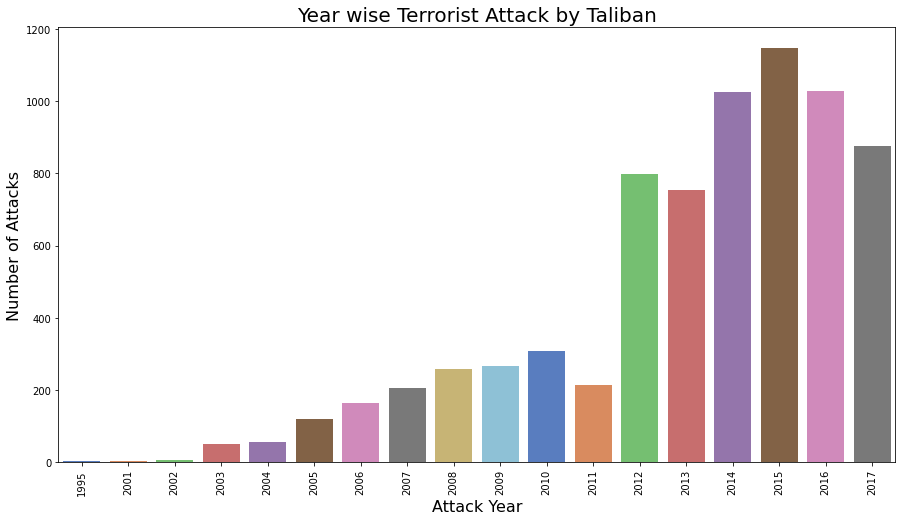

In [62]:
# Plot bar chart
plt.figure(figsize = (15,8))
sns.barplot(x = df['Year'].value_counts().index, y = df['Year'].value_counts().values, palette = 'muted')
plt.xlabel('Attack Year', fontsize = 16)
plt.ylabel('Number of Attacks', fontsize = 16)
plt.title('Year wise Terrorist Attack by Taliban', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

**Conclusion** - Taliban's attack has been consistent over the years since 2014.

**3. People killed by Taliban over the years.**


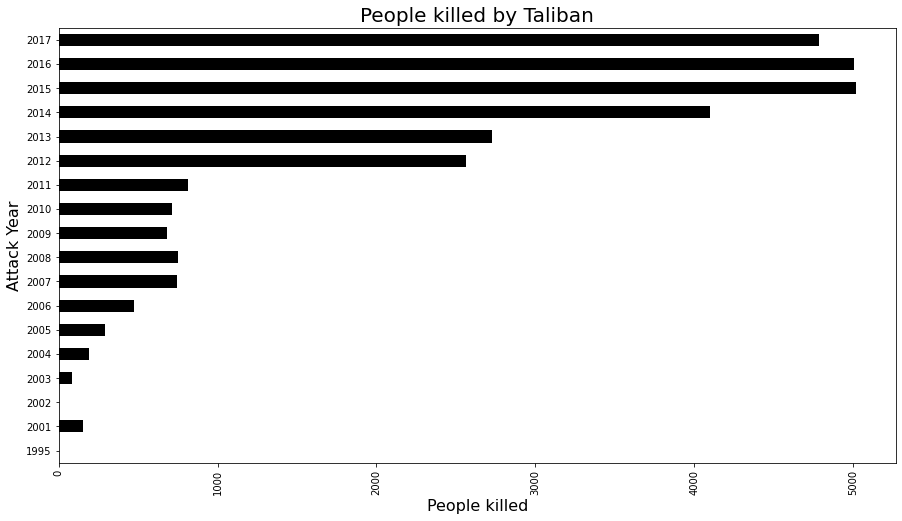

In [63]:
# Plot horizontal bar chart
plt.figure(figsize = (15,8))
df.groupby(['Year'])['Killed'].sum().plot(kind = 'barh', colormap = 'gnuplot')
plt.xlabel('People killed', fontsize = 16)
plt.ylabel('Attack Year', fontsize = 16)
plt.title('People killed by Taliban', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

**Conclusion** - Number of people killed by Taliban group is consistently high since 2014.

**4. Successful and Unsuccessful attacks by Taliban.**

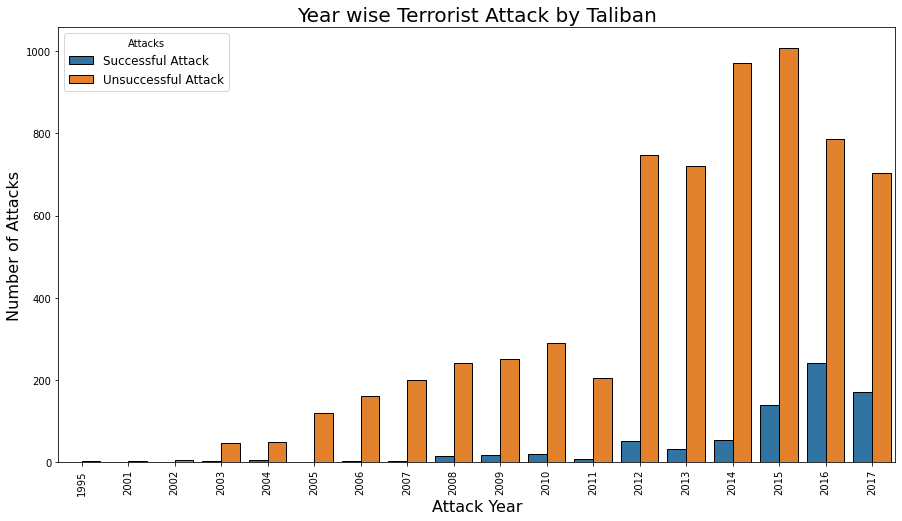

In [64]:
# Plot count of each year using bars
plt.figure(figsize = (15,8))
sns.countplot(x=df['Year'], hue='Attack_Success', data=df, edgecolor = 'k')
plt.xlabel('Attack Year', fontsize = 16)
plt.ylabel('Number of Attacks', fontsize = 16)
plt.title('Year wise Terrorist Attack by Taliban', fontsize = 20)
plt.xticks(rotation = 90)
plt.legend(title='Attacks', loc='upper left', labels=['Successful Attack', 'Unsuccessful Attack'], fontsize=12)
plt.show()

**Conclusion** - Maximum terrorist attacks by Taliban were in the year 2015, but most of them were unsuccessful. And the most successful attempts by Taliban were in the year 2016.

**5. Attack Type used by Taliban.**

(array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.]),
 <a list of 11 Text major ticklabel objects>)

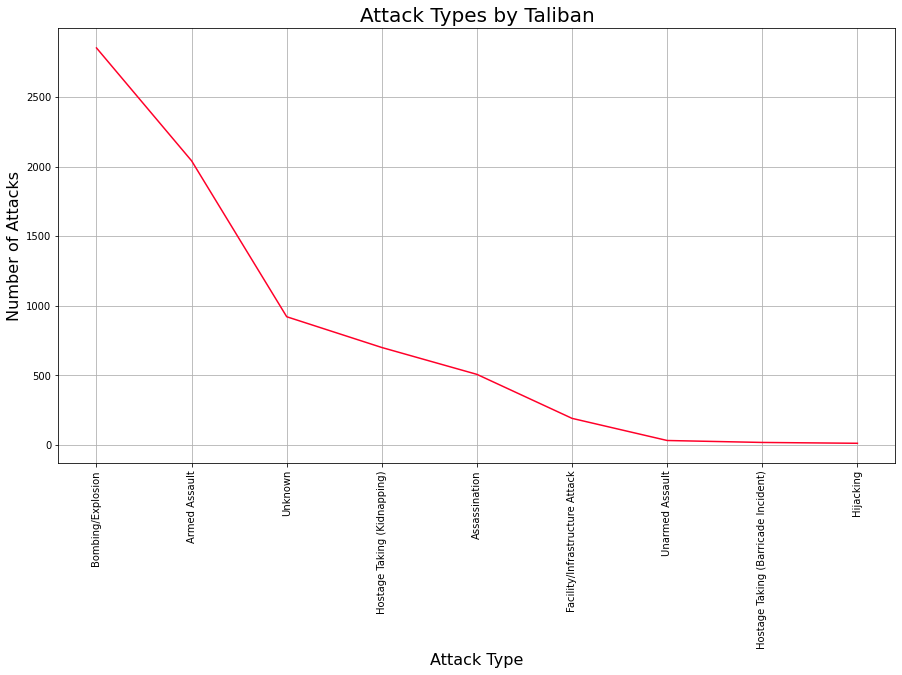

In [65]:
# Plot Line plot
plt.figure(figsize = (15,8))
plt.xlabel('Attack Type', fontsize = 16)
plt.ylabel('Number of Attacks', fontsize = 16)
plt.title('Attack Types by Taliban', fontsize = 20)
df['Attack_Type'].value_counts().plot(kind = 'line', grid = True, colormap = 'gist_rainbow')
plt.xticks(rotation = 90)

**Conclusion** - Clearly the most used method of Attacking by Taliban is Bombing/Explosion.

# **Let us explore about India.**

In [66]:
# Filter data
india_df = terrorism[terrorism['Country']== 'India']
india_df.head()

Attack_Success        Attack_Type Weapon_Used      Region Country  \
1186               1          Hijacking  Explosives  South Asia   India   
2764               1  Bombing/Explosion  Explosives  South Asia   India   
3857               1  Bombing/Explosion  Explosives  South Asia   India   
5327               1          Hijacking    Firearms  South Asia   India   
7337               1      Armed Assault    Firearms  South Asia   India   

              Terrorist_group        Targeted_group  Month  Day  Year  \
1186             Palestinians   Airports & Aircraft      2   22  1972   
2764             Ananda Marga  Government (General)      1    2  1975   
3857                  Unknown   Airports & Aircraft      5   26  1976   
5327  Japanese Red Army (JRA)   Airports & Aircraft      9   28  1977   
7337              Naga People                Police      1   13  1979   

            State                            Main_Target  Killed  Wounded  \
1186        Delhi                                  B-747       0        0   
2764        Bihar  Lalit Narayan Mishra and a legislator       4        0   
3857        Delhi                      New Delhi airport       0        0   
5327  Maharashtra                                   DC-8       0        0   
7337        Assam                                 patrol       0        0   

                                         Attack_Summary Attack_Motive  
1186                                          Not Known     Not Known  
2764  1/2/1975: The Indian Railway Minister, Lalit N...       Unknown  
3857                                          Not Known     Not Known  
5327                                          Not Known     Not Known  
7337                                          Not Known     Not Known

**6. Terrorist Group which is most active in India.**

In [67]:
# Returns first ten counts of unique values in the column Terrorist_group dropping the value 'Unknown' in the dataframe india_df
india_df['Terrorist_group'].value_counts()[:10].drop('Unknown')

Communist Party of India - Maoist (CPI-Maoist)    1848
Maoists                                           1371
Sikh Extremists                                    651
United Liberation Front of Assam (ULFA)            348
Hizbul Mujahideen (HM)                             199
Lashkar-e-Taiba (LeT)                              187
National Democratic Front of Bodoland (NDFB)       171
Garo National Liberation Army                      166
People's War Group (PWG)                            97
Name: Terrorist_group, dtype: int64

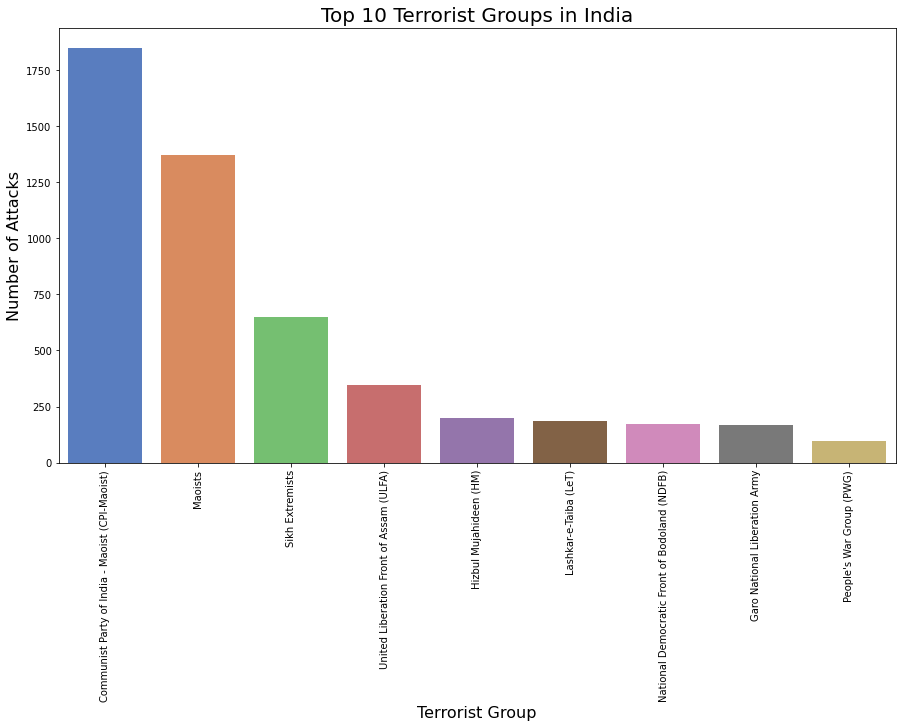

In [68]:
# Plot bar chart
plt.figure(figsize = (15,8))
plt.xlabel('Terrorist Group', fontsize = 16)
plt.ylabel('Number of Attacks', fontsize = 16)
plt.title('Top 10 Terrorist Groups in India', fontsize = 20)
plt.xticks(rotation = 90)
sns.barplot(x = india_df['Terrorist_group'].value_counts()[:10].drop('Unknown').index, y = india_df['Terrorist_group'].value_counts()[:10].drop('Unknown').values, palette = 'muted')
plt.show()

**Conclusion** - Clearly the maximum number of attacks are done  by Communist Party of India(CPI - Maoist) in India.

**7. People Killed and Wounded through the years in India.**

In [69]:
# groupby groups rows that have same values for the column Year
# sum() is the aggregate function which return sum
# reset_index() to reset index of the dataframe object to default indexing
Kill = india_df.groupby('Year')['Killed'].sum().reset_index()
Wound = india_df.groupby('Year')['Wounded'].sum().reset_index()
Kill

Year  Killed
0   1972       0
1   1975       4
2   1976       0
3   1977       0
4   1979      31
5   1980      17
6   1981      24
7   1982      64
8   1983      55
9   1984     195
10  1985      51
11  1986     340
12  1987     467
13  1988     953
14  1989     866
15  1990     903
16  1991    1091
17  1992    1133
18  1994     389
19  1995     357
20  1996     543
21  1997     815
22  1998     371
23  1999     469
24  2000     671
25  2001     660
26  2002     599
27  2003     472
28  2004     334
29  2005     466
30  2006     722
31  2007     626
32  2008     824
33  2009     774
34  2010     810
35  2011     499
36  2012     264
37  2013     467
38  2014     490
39  2015     387
40  2016     467
41  2017     465

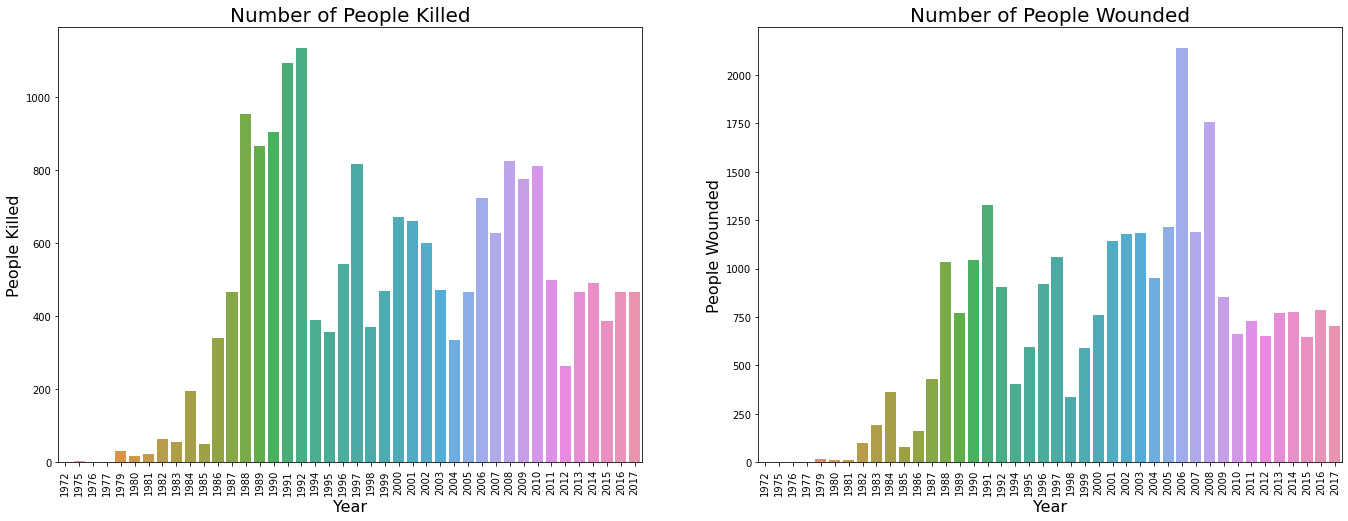

In [70]:
# Plot bar chart
# Plotting people killed year wise
plt.subplot(1,2,1)
sns.barplot(x = 'Year', y= 'Killed',data= Kill)
plt.xlabel('Year', fontsize = 16)
plt.ylabel('People Killed', fontsize = 16)
plt.title('Number of People Killed', fontsize = 20)
plt.xticks(rotation = 90)

# Plotting people Wounded year wise
plt.subplot(1,2,2)
sns.barplot(x = 'Year', y = 'Wounded',data= Wound)
plt.xlabel('Year', fontsize = 16)
plt.ylabel('People Wounded', fontsize = 16)
plt.title('Number of People Wounded', fontsize = 20)
plt.xticks(rotation = 90)
plt.gcf().set_size_inches(23,8)

**Conclusion** - Maximum number of people killed in India was in the year 1992 and maximum wounded were in the year 2006.

**8. Most targeted group in India.**

In [73]:
# Returns counts of unique values in the column Targeted_group in the dataframe india_df
india_df['Targeted_group'].value_counts()

Private Citizens & Property       3013
Police                            2244
Government (General)              1680
Business                          1079
Military                           914
Transportation                     784
Unknown                            555
Educational Institution            284
Violent Political Party            234
Religious Figures/Institutions     212
Terrorists/Non-State Militia       143
Telecommunication                  134
Journalists & Media                 87
Utilities                           81
Tourists                            30
Airports & Aircraft                 28
NGO                                 20
Government (Diplomatic)             19
Food or Water Supply                12
Maritime                             3
Other                                2
Name: Targeted_group, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]), <a list of 21 Text major ticklabel objects>)

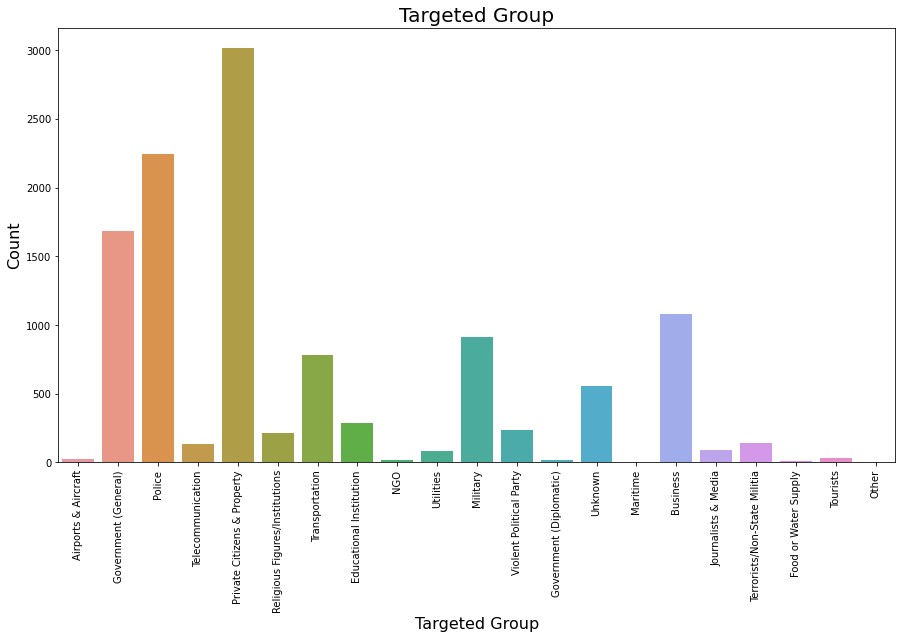

In [72]:
# Plot count chart
plt.figure(figsize = (15,8))
sns.countplot(x = india_df['Targeted_group'])
plt.xlabel('Targeted Group', fontsize = 16)
plt.ylabel('Count', fontsize = 16)
plt.title('Targeted Group', fontsize = 20)
plt.xticks(rotation = 90)

**Conclusion** - The targeted group which is attacked most by the terrorist group in India is Private Citizens and Property.

**9. Attack Types and the Weapon used most in India in the Terrorist attacks.**


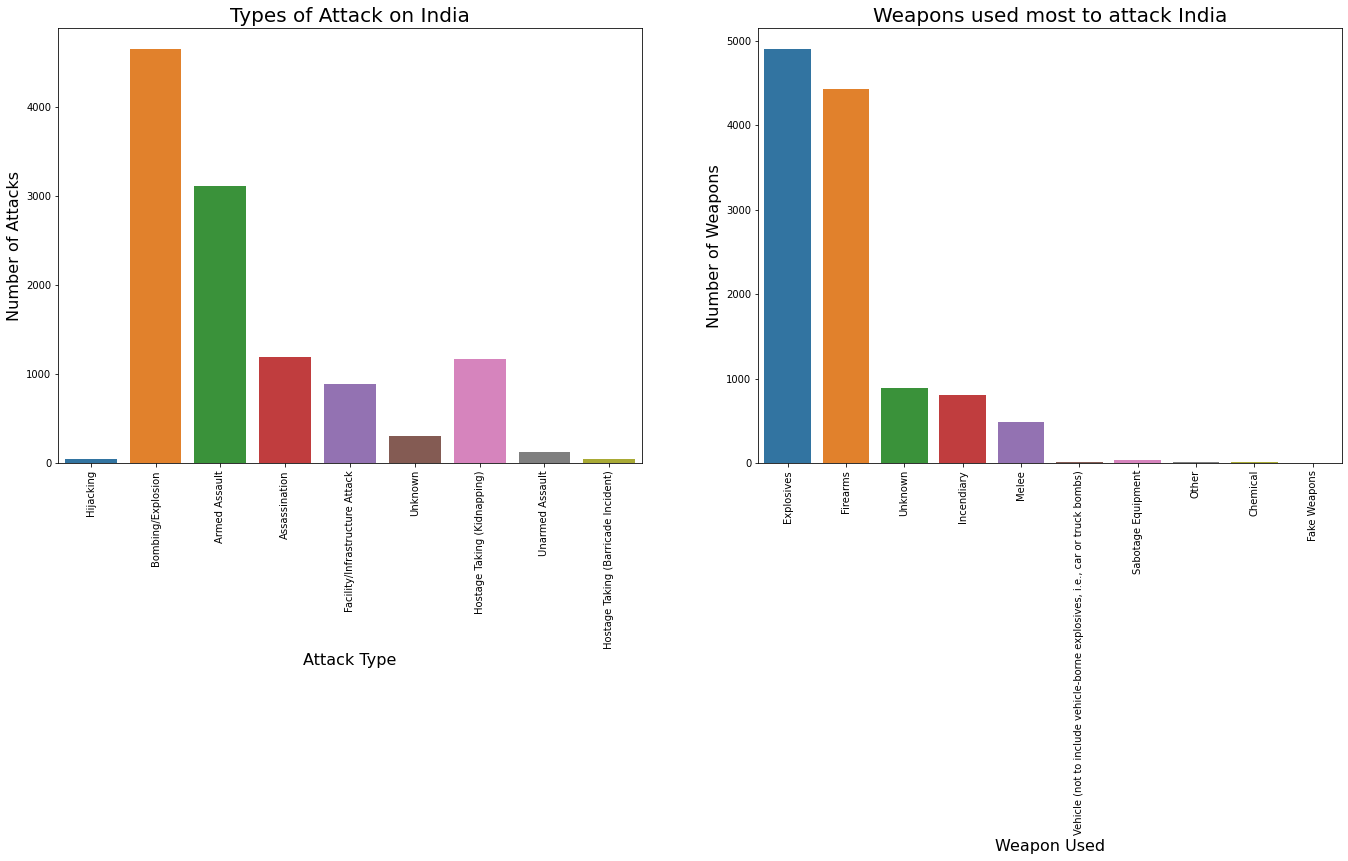

In [74]:
# Plot count chart
# Plotting Attack Types in India
plt.subplot(1,2,1)
sns.countplot(x = india_df['Attack_Type'])
plt.xlabel('Attack Type', fontsize = 16)
plt.ylabel('Number of Attacks', fontsize = 16)
plt.title('Types of Attack on India', fontsize = 20)
plt.xticks(rotation = 90)

# Plotting Weapons used in Attacks in India
plt.subplot(1,2,2)
sns.countplot(x = india_df['Weapon_Used'])
plt.xlabel('Weapon Used', fontsize = 16)
plt.ylabel('Number of Weapons', fontsize = 16)
plt.title('Weapons used most to attack India', fontsize = 20)
plt.xticks(rotation = 90)
plt.gcf().set_size_inches(23,8)

**Conclusion** - The Attack type which mostly happens in India is Bombing/Explosion. Very clearly we can decipher from the other plot that the most used weapon to attack is Explosives and firearms. The relation between the two plots is clearly evident.

**10. Since CPIM is the most active terrorist group in india, hence we will see its number of attacks, type of attacks and Weapon used by it on India.**

In [76]:
# Filter data
cpim_df = india_df[india_df['Terrorist_group']== 'Communist Party of India - Maoist (CPI-Maoist)']
cpim_df.head()

Attack_Success        Attack_Type Weapon_Used      Region Country  \
77968               1  Bombing/Explosion  Explosives  South Asia   India   
78311               1      Armed Assault  Explosives  South Asia   India   
78412               1      Armed Assault       Melee  South Asia   India   
78754               1  Bombing/Explosion  Explosives  South Asia   India   
78780               1      Armed Assault    Firearms  South Asia   India   

                                      Terrorist_group  \
77968  Communist Party of India - Maoist (CPI-Maoist)   
78311  Communist Party of India - Maoist (CPI-Maoist)   
78412  Communist Party of India - Maoist (CPI-Maoist)   
78754  Communist Party of India - Maoist (CPI-Maoist)   
78780  Communist Party of India - Maoist (CPI-Maoist)   

                     Targeted_group  Month  Day  Year           State  \
77968                        Police      4   28  2005  Andhra Pradesh   
78311   Private Citizens & Property      6   19  2005    Chhattisgarh   
78412  Terrorists/Non-State Militia      7    5  2005       Jharkhand   
78754                        Police      8   12  2005   Uttar Pradesh   
78780          Government (General)      8   15  2005  Andhra Pradesh   

                                             Main_Target  Killed  Wounded  \
77968    Superintendent of Police, Mahesh Chandra Laddha       1        9   
78311                                   Indian Civilians       8      100   
78412                                            Members       3        0   
78754                     A police station in Chabilapur       2        3   
78780  Congressman, Narsi Reddy, and Narayanpet's Mun...      10        0   

                                          Attack_Summary  \
77968  04/28/2005: A police superintendent escaped a ...   
78311  06/19/2005: Near Kotrapal Village, Dantewara, ...   
78412  07/05/2005: Assailants beheaded three Shanti S...   
78754  08/12/2005: 50 members of the Communist Party ...   
78780  08/15/2005: Suspected Communist Party of India...   

                                           Attack_Motive  
77968                                            Unknown  
78311  To stop the villagers from banding together to...  
78412                                          Not Known  
78754                                            Unknown  
78780                                            Unknown

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text major ticklabel objects>)

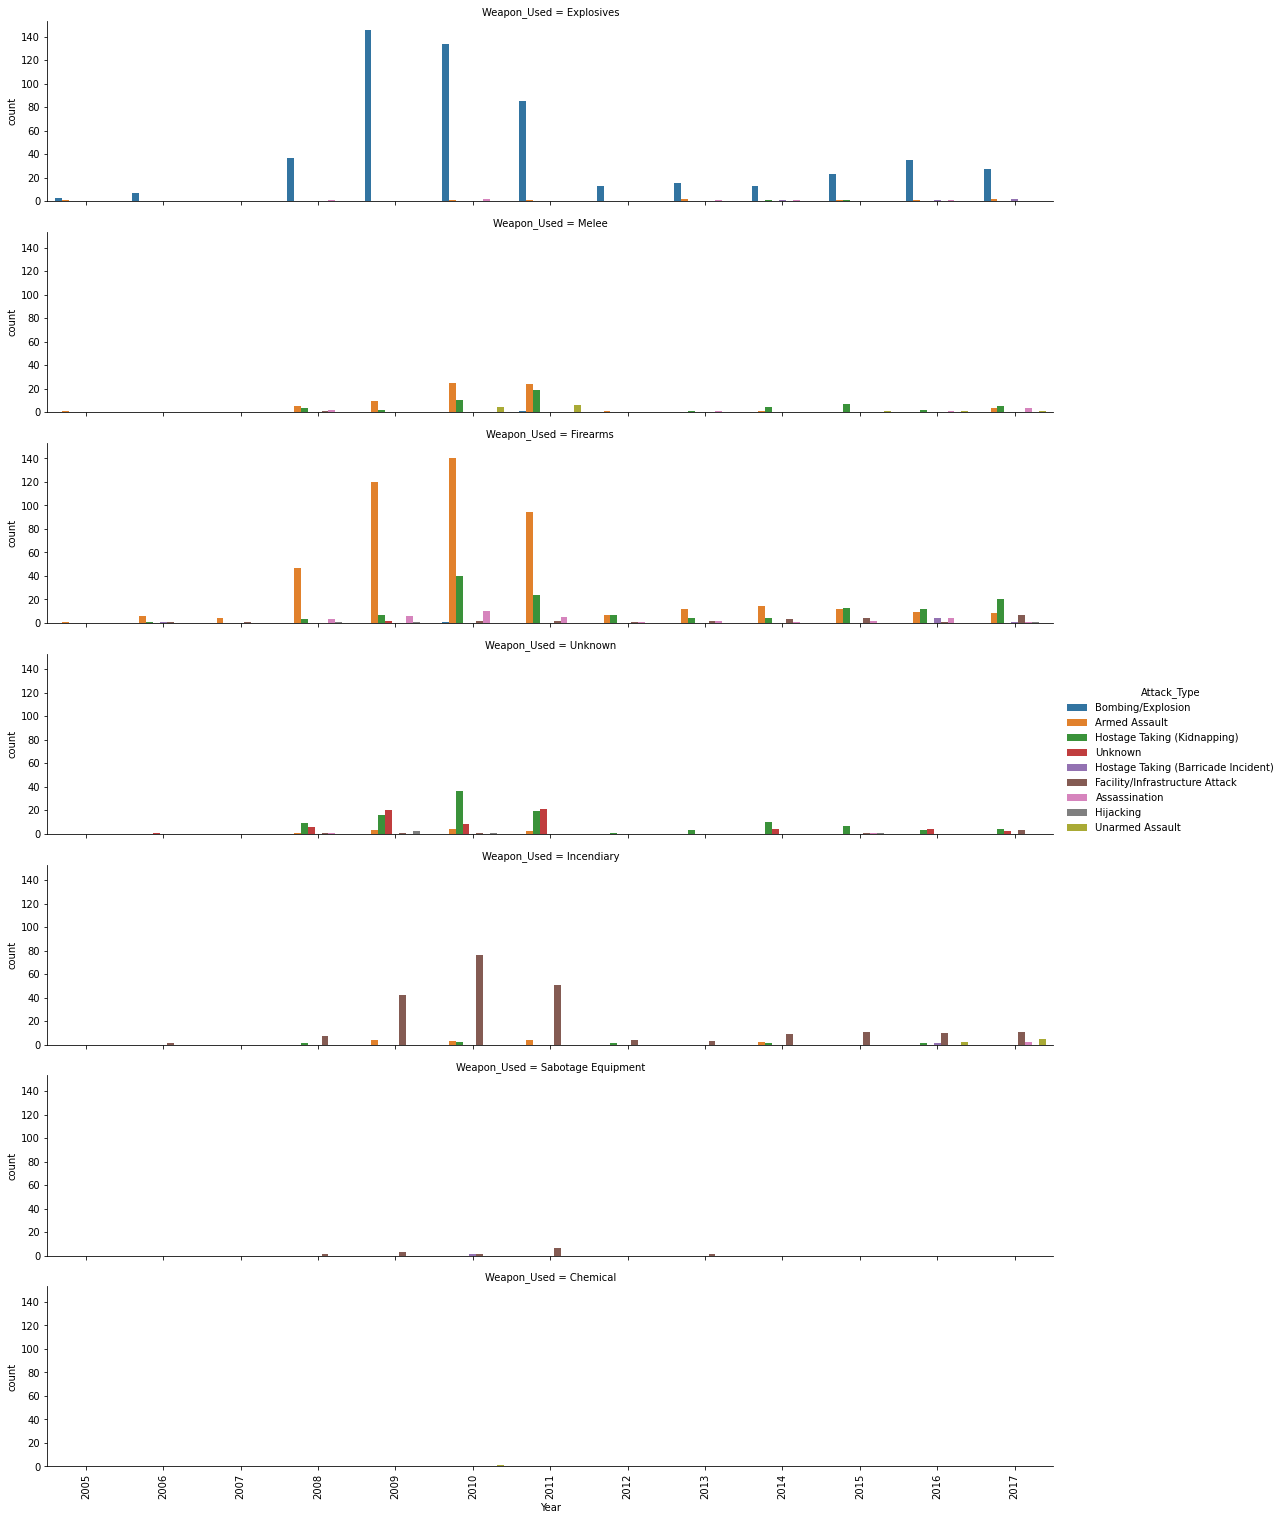

In [77]:
# Plotting categorical plot to compare different features of dataset

sns.catplot(x = 'Year', hue="Attack_Type", row="Weapon_Used", data=cpim_df, kind="count",height=3, aspect=5)
plt.xticks(rotation = 90)

**Conclusion** - So the maximum number of attacks by the CPIM on India was in the year 2010 and the weapon used in the attack was explosives and the attack type was Bombing/Explosion. Armed Assault and Bombing/Explosion is the most favored attack type of CPIM. And Firearms are the Weapons they have mostly used in the attack.

# **FINAL SUMMARY OF CONCLUSION**



Here, we have analysed the Terrorist Attacks a bit more in detail for India. In the same way, we can also analyze other countries.
After performing the Exploratory Data Analysis on the given dataset, we get the following insights -

1. The maximum number of Terrorist attacks worldwide are from Bombing/ Explosion followed by Armed Assault then Assassination and so on.
2. The most affected country by terrorism is Iraq followed by Pakistan, then Afghanistan and then India.
3. The most Targeted group which is attacked is Private Citizens and Property.
4. Baghdad is the most affected state by Terrorism.
5. The most used Weapon in terrorism is Explosives which are used 50% of the time. 33% of the time Firearms are used.
6. In the year 2014, there was the highest number of Terrorist attacks in the world.
7. Although the maximum number of attacks was in 2014, the maximum successful attacks were in the year 2016.
8. The most active terrorist group is the Taliban followed by ISIL.
9. The maximum number of attacks happened in the Middle East and North Africa Region year wise.
10. There is no strong correlation between any parameters in the dataset. The number of killed and wounded persons are slightly related.

**Summary about the Top Terrorist Group Taliban**
11. Taliban did maximum attacks in the year 2015.
12. People killed by the Taliban were maximum in the years 2015 and 2016.
13. The maximum number of attacks by the Taliban was in the year 2015, but the maximum successful attacks were in the year 2016.
14. The most used method of attacking by the Taliban is Bombing/Explosion.

**Summary about Terrorist attacks in India**
15. The most active Terrorist group in India is the Communist Party of India (CPI - Maoist).
16. The maximum number of people killed in India was in the year 1992 and maximum number of wounded was in the year 2006.
17. The targeted group which is attacked most by the terrorist group in India is Private Citizens and Property.
18. The Attack type which mostly happens in India is Bombing/Explosion. The most used weapon to attack is Explosives and firearms.
19. So the maximum number of attacks by CPIM on India was in the year 2010 and the weapon used in the attack was explosives and the attack type was Bombing/Explosion. Armed Assault and Bombing/Explosion is the most favored attack type of CPIM. And Firearms are the Weapons they have mostly used in the attack.

The most used weapon in terrorist activities is Explosives and firearms and the favoured method of attack by terrorists is Bombing/ Explosion, hence, the UN Counter-Terrorism Centre should keep a close eye on the movement of Explosives and firearms.
In India since the targeted group for attack by terrorists is Private Citizens and Property hence Stronger Security should be provided.